In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

In [2]:
df_dengue = pd.read_csv('../data/clean/dengue_cases.csv', index_col=0)
df_dengue

,Cases
2009-01-04,67.0
2009-01-11,50.0
2009-01-18,46.0
2009-01-25,67.0
2009-02-01,60.0
...,...
2017-11-26,20.0
2017-12-03,29.0
2017-12-10,29.0
2017-12-17,22.0


In [3]:
df_weather = pd.read_csv('../data/clean/weather_data.csv', header=[0,1], index_col=[0])
df_weather

RAINFALL                    TMAX  TMIN      TMEAN    RH        \
                min    max       mean   max   min       mean   min   max   
date                                                                       
2009-01-04      0.0    1.4   0.475000  31.7  23.6  27.775000  82.0  83.0   
2009-01-11      0.0   35.6  12.142857  33.0  23.5  28.385714  82.0  86.0   
2009-01-18      0.0   54.0  14.357143  30.7  22.3  25.771429  87.0  96.0   
2009-01-25      0.0   19.2   2.742857  33.0  23.7  28.385714  80.0  87.0   
2009-02-01      0.0   24.8   4.028571  33.0  23.3  28.100000  77.0  87.0   
...             ...    ...        ...   ...   ...        ...   ...   ...   
2017-11-26      0.0    9.8   3.257143  33.6  24.2  27.928571  74.0  89.0   
2017-12-03      0.0    0.4   0.057143  34.1  24.2  29.528571  74.0  80.0   
2017-12-10      0.0  109.8  24.342857  35.0  24.4  29.457143  72.0  81.0   
2017-12-17      0.0   31.0  10.142857  34.4  24.0  28.328571  68.0  89.0   
2017-12-24      0.0   39.4   6.128571  34.0  23.6  28.550000  70.0  86.0   

                      WIND SPEED  
                 mean       mean  
date                              
2009-01-04  82.750000   2.250000  
2009-01-11  83.857143   2.000000  
2009-01-18  90.428571   2.714286  
2009-01-25  83.428571   1.571429  
2009-02-01  82.285714   2.285714  
...               ...        ...  
2017-11-26  82.285714   1.714286  
2017-12-03  76.571429   2.142857  
2017-12-10  76.000000   1.857143  
2017-12-17  78.000000   1.285714  
2017-12-24  78.642857   1.857143  

[468 rows x 10 columns]

In [4]:
df_merged = pd.merge(df_dengue, df_weather, left_index=True, right_index=True)
df_merged.columns = ['Cases', 'RAINFALL min', 'RAINFALL max', 'RAINFALL mean', 'TMAX', 'TMIN', 'TMEAN', 'RH min', 'RH max',
                    'RH mean', 'WINDSPEED mean']
df_merged

,Cases,RAINFALL min,RAINFALL max,RAINFALL mean,TMAX,TMIN,TMEAN,RH min,RH max,RH mean,WINDSPEED mean
2009-01-04,67.0,0.0,1.4,0.475000,31.7,23.6,27.775000,82.0,83.0,82.750000,2.250000
2009-01-11,50.0,0.0,35.6,12.142857,33.0,23.5,28.385714,82.0,86.0,83.857143,2.000000
2009-01-18,46.0,0.0,54.0,14.357143,30.7,22.3,25.771429,87.0,96.0,90.428571,2.714286
2009-01-25,67.0,0.0,19.2,2.742857,33.0,23.7,28.385714,80.0,87.0,83.428571,1.571429
2009-02-01,60.0,0.0,24.8,4.028571,33.0,23.3,28.100000,77.0,87.0,82.285714,2.285714
...,...,...,...,...,...,...,...,...,...,...,...
2017-11-26,20.0,0.0,9.8,3.257143,33.6,24.2,27.928571,74.0,89.0,82.285714,1.714286
2017-12-03,29.0,0.0,0.4,0.057143,34.1,24.2,29.528571,74.0,80.0,76.571429,2.142857
2017-12-10,29.0,0.0,109.8,24.342857,35.0,24.4,29.457143,72.0,81.0,76.000000,1.857143
2017-12-17,22.0,0.0,31.0,10.142857,34.4,24.0,28.328571,68.0,89.0,78.000000,1.285714


In [5]:
df_merged.index = pd.to_datetime(df_merged.index)
# df_merged.index = df_merged.index.to_period('W')
df_merged

,Cases,RAINFALL min,RAINFALL max,RAINFALL mean,TMAX,TMIN,TMEAN,RH min,RH max,RH mean,WINDSPEED mean
2009-01-04,67.0,0.0,1.4,0.475000,31.7,23.6,27.775000,82.0,83.0,82.750000,2.250000
2009-01-11,50.0,0.0,35.6,12.142857,33.0,23.5,28.385714,82.0,86.0,83.857143,2.000000
2009-01-18,46.0,0.0,54.0,14.357143,30.7,22.3,25.771429,87.0,96.0,90.428571,2.714286
2009-01-25,67.0,0.0,19.2,2.742857,33.0,23.7,28.385714,80.0,87.0,83.428571,1.571429
2009-02-01,60.0,0.0,24.8,4.028571,33.0,23.3,28.100000,77.0,87.0,82.285714,2.285714
...,...,...,...,...,...,...,...,...,...,...,...
2017-11-26,20.0,0.0,9.8,3.257143,33.6,24.2,27.928571,74.0,89.0,82.285714,1.714286
2017-12-03,29.0,0.0,0.4,0.057143,34.1,24.2,29.528571,74.0,80.0,76.571429,2.142857
2017-12-10,29.0,0.0,109.8,24.342857,35.0,24.4,29.457143,72.0,81.0,76.000000,1.857143
2017-12-17,22.0,0.0,31.0,10.142857,34.4,24.0,28.328571,68.0,89.0,78.000000,1.285714


In [6]:
# drop RH min, RH max, TMAX, RAINFALL max, RAINFALL min when modelling
df_merged = df_merged.drop(['RH min', 'RH max', 'TMAX', 'RAINFALL max', 'RAINFALL min'], axis=1)
df_merged

,Cases,RAINFALL mean,TMIN,TMEAN,RH mean,WINDSPEED mean
2009-01-04,67.0,0.475000,23.6,27.775000,82.750000,2.250000
2009-01-11,50.0,12.142857,23.5,28.385714,83.857143,2.000000
2009-01-18,46.0,14.357143,22.3,25.771429,90.428571,2.714286
2009-01-25,67.0,2.742857,23.7,28.385714,83.428571,1.571429
2009-02-01,60.0,4.028571,23.3,28.100000,82.285714,2.285714
...,...,...,...,...,...,...
2017-11-26,20.0,3.257143,24.2,27.928571,82.285714,1.714286
2017-12-03,29.0,0.057143,24.2,29.528571,76.571429,2.142857
2017-12-10,29.0,24.342857,24.4,29.457143,76.000000,1.857143
2017-12-17,22.0,10.142857,24.0,28.328571,78.000000,1.285714


In [35]:
from sklearn import preprocessing

def scale_data(data):
    mm_scaler = preprocessing.MinMaxScaler()
    df_mm = mm_scaler.fit_transform(data)

    df_mm = pd.DataFrame(df_mm)
    return df_mm

In [37]:
scale_data(df_merged)

,0,1,2,3,4,5
0,0.132075,0.015559,0.52,0.405284,0.692857,0.546875
1,0.091981,0.397754,0.50,0.515464,0.737143,0.437500
2,0.082547,0.470285,0.26,0.043814,1.000000,0.750000
3,0.132075,0.089846,0.54,0.515464,0.720000,0.250000
4,0.115566,0.131961,0.46,0.463918,0.674286,0.562500
...,...,...,...,...,...,...
463,0.021226,0.106692,0.64,0.432990,0.674286,0.312500
464,0.042453,0.001872,0.64,0.721649,0.445714,0.500000
465,0.042453,0.797380,0.68,0.708763,0.422857,0.375000
466,0.025943,0.332241,0.60,0.505155,0.502857,0.125000


In [7]:
# cols_to_shift = {'RAINFALL mean': 2, 'TMIN': 3, 'TMEAN': 0}
# forecast_lag = 12
# split = 0.66

# # add new date index based on max lag to dframe
# max_lag = cols_to_shift[max(cols_to_shift, key=cols_to_shift.get)]
# df_temp = pd.DataFrame(df_merged, index=df_merged[max_lag:].index.union(pd.date_range(start='1/1/2018', periods=max_lag, freq='W')))

# # shift columns by value
# for col in cols_to_shift:
#     col_lag = cols_to_shift[col]
#     df_temp[col] = df_temp[col].shift(col_lag)

# # new dframe with cases + features
# cols_to_return = ['Cases'] + list(cols_to_shift.keys())
# data = df_temp[cols_to_return].dropna(subset=list(cols_to_shift.keys()))

# # cut data to train, test, and forecast
# min_lag = cols_to_shift[min(cols_to_shift, key=cols_to_shift.get)]
# data, forecast = data[:(min_lag-forecast_lag)], data[(min_lag-forecast_lag):]

# size = int(len(X) * split)
# train, test = data[0:size], data[size:len(data)]

In [8]:
def create_dataset(data, cols_to_shift=None, split=0.66):
    
    if cols_to_shift:
        # add new date index based on max lag to dframe
        max_lag = cols_to_shift[max(cols_to_shift, key=cols_to_shift.get)]
        df_temp = pd.DataFrame(data, index=data[max_lag:].index.union(pd.date_range(start='1/1/2018', periods=max_lag, freq='W')))
        
        
        # shift columns by value
        for col in cols_to_shift:
            col_lag = cols_to_shift[col]
            df_temp[col] = df_temp[col].shift(col_lag)
        
        # new dframe with cases + features
        cols_to_return = ['Cases'] + list(cols_to_shift.keys())
        data = df_temp[cols_to_return].dropna(subset=list(cols_to_shift.keys()))

    size = int(len(data) * split)
    train, test = data[0:size], data[size:len(data)]
    
    return train, test

In [9]:
def create_forecast_exog(data, index, step=1):
    return data[index:index+step].to_numpy().tolist()

In [10]:
# create_forecast_exog(test[exog], 12, 12)

## Rolling Forecast ARIMA - 1 week ahead using intuitive parameters

In [11]:
# from tqdm import tqdm
# from statsmodels.tsa.arima.model import ARIMA
# from sklearn.metrics import mean_squared_error

# warnings.filterwarnings("ignore")

# cols_to_shift = {'RAINFALL mean': 2}
# n_step = 5
# train, test = create_dataset(df_merged, cols_to_shift)
# exog = list(cols_to_shift.keys())

# history = train['Cases'].to_numpy().tolist()
# history_exog = train[exog].to_numpy().tolist()

# predictions = list()

# min_lag = cols_to_shift[min(cols_to_shift, key=cols_to_shift.get)]
# if n_step < min_lag:
#     max_index = len(test['Cases'].dropna())
# else:
#     max_index = len(test) - n_step

# # walk-forward validation
# for t in tqdm(range(max_index)):
    
#     model = ARIMA(history, exog=history_exog, order=(3,0,3))
#     model_fit = model.fit()
    
#     forecast_exog = create_forecast_exog(test[exog], t, n_step)
#     output = model_fit.forecast(steps=n_step, exog=forecast_exog)
    
#     yhat = output[0]
#     predictions.append(yhat)
#     obs = test['Cases'].values[t].tolist()
#     history.append(obs)
#     obs2 = test[exog].values[t].tolist()
#     history_exog.append(obs2)
# #     print('predicted=%f, expected=%f' % (yhat, obs))
# # evaluate forecasts
# pred = pd.DataFrame(predictions, index=test[n_step:].index)
# rmse = np.sqrt(mean_squared_error(test[n_step:max_index]['Cases'].values, predictions[:-n_step]))
# print('Test RMSE: %.3f' % rmse)
# # plot forecasts against actual outcomes
# plt.figure(figsize=(12, 6), dpi=80)
# plt.plot(pd.concat([train['Cases'], test['Cases']]), color='C0')
# plt.plot(pred, color='red')
# plt.show();

In [12]:
# pred = pd.DataFrame(predictions, index=test[n_step:].index)
# rmse = np.sqrt(mean_squared_error(test[n_step:max_index]['Cases'].values, predictions[:-n_step]))
# print('Test RMSE: %.3f' % rmse)
# # plot forecasts against actual outcomes
# plt.figure(figsize=(12, 6), dpi=80)
# plt.plot(pd.concat([train['Cases'], test['Cases']]), color='C0')
# plt.plot(pred, color='red')
# plt.show();

# Grid Search of ARIMA

In [13]:
from math import sqrt
from multiprocessing import cpu_count
from itertools import repeat
from multiprocessing import Process, Manager, Pool
from warnings import catch_warnings
from warnings import filterwarnings
import traceback
import arimax
import istarmap
from tqdm import tqdm


# grid search configs
def grid_search(cfg, exog_list, n_step=1, parallel=True):
    data = df_merged
    manager = Manager()
    scores = manager.list()
    print('starting grid search')
    if __name__ == '__main__':
        try:
            with Pool(cpu_count()-1) as pool:
                it = zip(repeat(data), repeat(scores), repeat(cfg), repeat(n_step), exog_list)
                for _ in tqdm(pool.istarmap(arimax.score_model, list(it)), total=len(list(it))):
                    pass
        except Exception as e:
            raise e
    # remove empty results
    scores = list([r for r in scores if r[1] != None])
    # sort configs by error, asc
    scores.sort(key=lambda tup: tup[1])
    return scores

# plot predicted of best model
def plot_modelz(predicted):
    plt.figure(figsize=(12, 6), dpi=80)
    plt.plot(df_merged['Cases'], color='C0')
    plt.plot(predicted, color='red')
    plt.show()

# create a set of sarima configs to try
def arima_configs():
    models = list()
    # define config lists
    p_params = [0, 1, 2, 3]
    d_params = [0, 1]
    q_params = [0, 1, 2, 3]
#     t_params = ['n','c']
    # create config instances
    for p in p_params:
        for d in d_params:
            for q in q_params:
                    cfg = [(p,d,q)]
                    models.append(cfg)
    return models

In [14]:
from itertools import repeat

def create_exog_dict(col_name, max_lag):
    return [{k: v} for k, v in zip(repeat(col_name), range(0, max_lag+1))]

# 1 week forecasting

0it [00:00, ?it/s]

starting grid search


13it [02:43, 12.58s/it]

done
{'RAINFALL mean': 0} 31.13047768324495
{'RAINFALL mean': 1} 31.203096280719738
{'RAINFALL mean': 2} 31.27734650943952


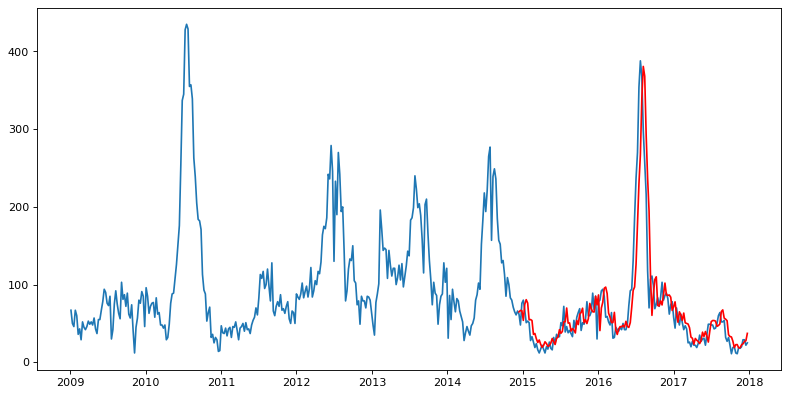

In [15]:
# best model for arima 1 week
cfg = [(1, 0, 3)]
# TMIN	TMEAN	RH mean	WINDSPEED mean
exog_list = create_exog_dict('RAINFALL mean', 12)

# 1 week forecast
n_step = 1
# grid search
scores = grid_search(cfg, exog_list, n_step)
print('done')
# list top 3 configs
for lag, error, p in scores[:3]:
    print(lag, error)
plot_modelz(scores[0][2])

0it [00:00, ?it/s]

starting grid search


13it [04:06, 18.97s/it]

done
{'TMIN': 1} 31.328811650157018
{'TMIN': 0} 32.03413878612599
{'TMIN': 2} 32.25835968044521


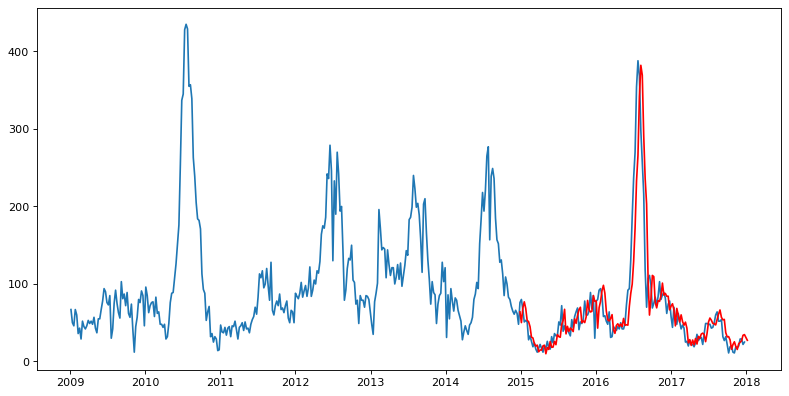

In [16]:
# best model for arima 1 week
cfg = [(1, 0, 3)]
# TMIN	TMEAN	RH mean	WINDSPEED mean
exog_list = create_exog_dict('TMIN', 12)

# 1 week forecast
n_step = 1
# grid search
scores = grid_search(cfg, exog_list, n_step)
print('done')
# list top 3 configs
for lag, error, p in scores[:3]:
    print(lag, error)
plot_modelz(scores[0][2])

0it [00:00, ?it/s]

starting grid search


13it [04:28, 20.62s/it]


done
{'TMEAN': 0} 30.958461004421594
{'TMEAN': 2} 31.075773809312917
{'TMEAN': 1} 31.234154025878055


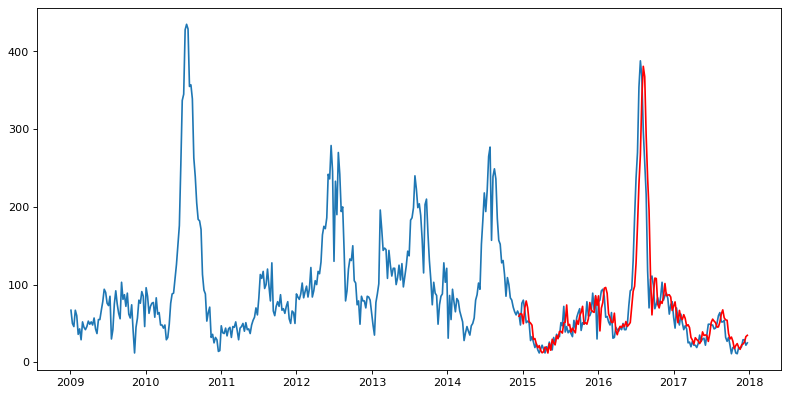

In [17]:
# best model for arima 1 week
cfg = [(1, 0, 3)]
# TMIN	TMEAN	RH mean	WINDSPEED mean
exog_list = create_exog_dict('TMEAN', 12)

# 1 week forecast
n_step = 1
# grid search
scores = grid_search(cfg, exog_list, n_step)
print('done')
# list top 3 configs
for lag, error, p in scores[:3]:
    print(lag, error)
plot_modelz(scores[0][2])

0it [00:00, ?it/s]

starting grid search


13it [03:58, 18.34s/it]

done
{'RH mean': 8} 31.836600346360303
{'RH mean': 0} 31.84130755566464
{'RH mean': 10} 31.996760130935193


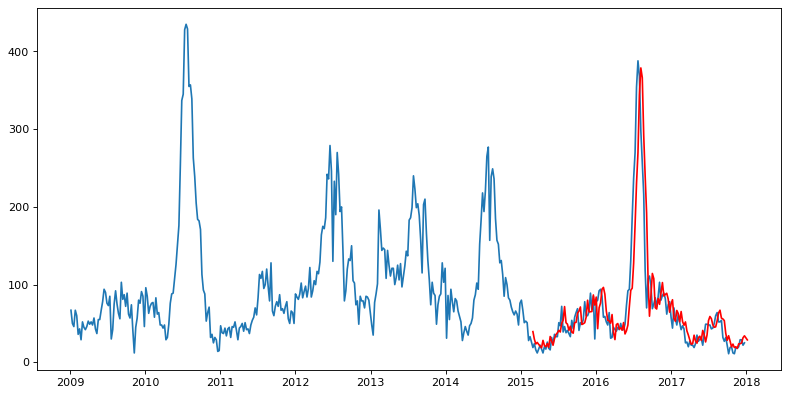

In [18]:
# best model for arima 1 week
cfg = [(1, 0, 3)]
# TMIN	TMEAN	RH mean	WINDSPEED mean
exog_list = create_exog_dict('RH mean', 12)

# 1 week forecast
n_step = 1
# grid search
scores = grid_search(cfg, exog_list, n_step)
print('done')
# list top 3 configs
for lag, error, p in scores[:3]:
    print(lag, error)
plot_modelz(scores[0][2])

0it [00:00, ?it/s]

starting grid search


13it [04:53, 22.59s/it]


done
{'WINDSPEED mean': 1} 31.553446235559875
{'WINDSPEED mean': 6} 31.6100827002633
{'WINDSPEED mean': 5} 31.69045575754801


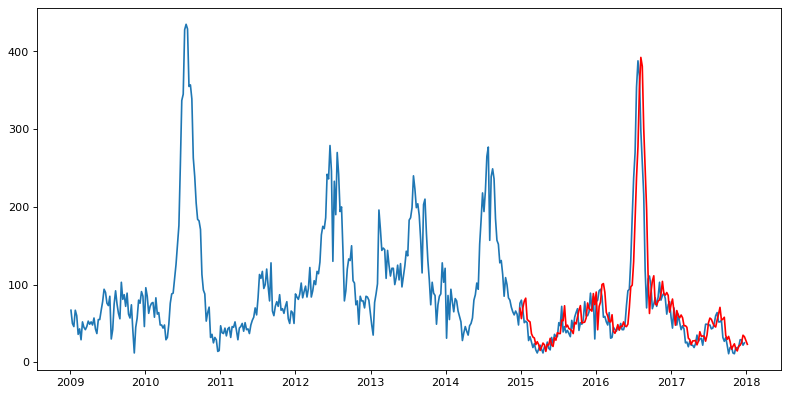

In [19]:
# best model for arima 1 week
cfg = [(1, 0, 3)]
# TMIN	TMEAN	RH mean	WINDSPEED mean
exog_list = create_exog_dict('WINDSPEED mean', 12)

# 1 week forecast
n_step = 1
# grid search
scores = grid_search(cfg, exog_list, n_step)
print('done')
# list top 3 configs
for lag, error, p in scores[:3]:
    print(lag, error)
plot_modelz(scores[0][2])

# 4 week forecasting

0it [00:00, ?it/s]

starting grid search


13it [02:41, 12.43s/it]

done
{'RAINFALL mean': 4} 56.73722546477671
{'RAINFALL mean': 0} 56.852293915633034
{'RAINFALL mean': 6} 56.9050644801908


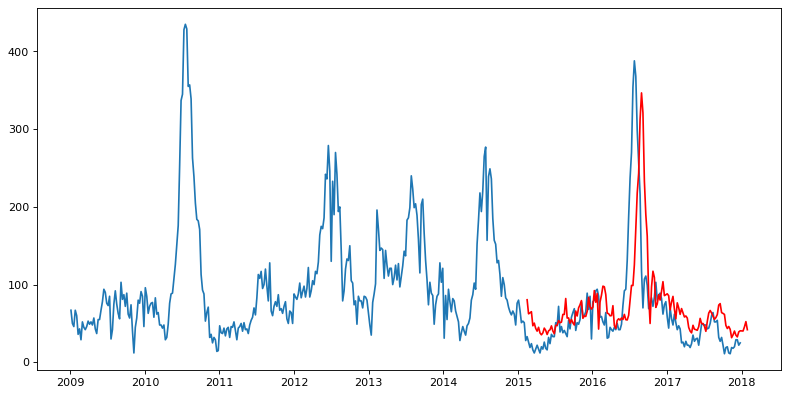

In [20]:
# best model for arima 1 week
cfg = [(1, 0, 3)]
# TMIN	TMEAN	RH mean	WINDSPEED mean
exog_list = create_exog_dict('RAINFALL mean', 12)

# 1 week forecast
n_step = 4
# grid search
scores = grid_search(cfg, exog_list, n_step)
print('done')
# list top 3 configs
for lag, error, p in scores[:3]:
    print(lag, error)
plot_modelz(scores[0][2])

0it [00:00, ?it/s]

starting grid search


13it [04:08, 19.15s/it]


done
{'TMIN': 1} 56.500365977131615
{'TMIN': 0} 58.648399087285156
{'TMIN': 2} 60.97361742437293


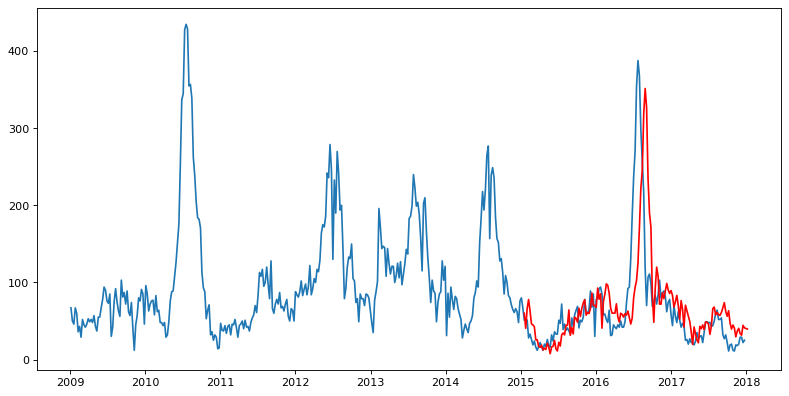

In [21]:
# best model for arima 1 week
cfg = [(1, 0, 3)]
# TMIN	TMEAN	RH mean	WINDSPEED mean
exog_list = create_exog_dict('TMIN', 12)

# 1 week forecast
n_step = 4
# grid search
scores = grid_search(cfg, exog_list, n_step)
print('done')
# list top 3 configs
for lag, error, p in scores[:3]:
    print(lag, error)
plot_modelz(scores[0][2])

0it [00:00, ?it/s]

starting grid search


13it [04:28, 20.69s/it]

done
{'TMEAN': 0} 55.70976460971286
{'TMEAN': 2} 55.88507949064476
{'TMEAN': 1} 56.45067273796064


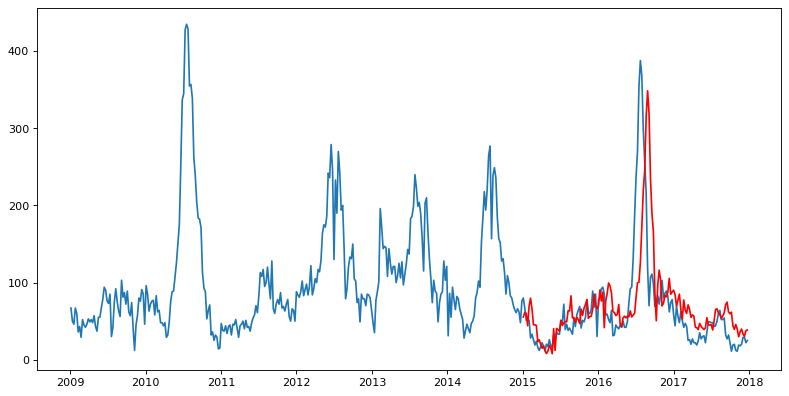

In [22]:
# best model for arima 1 week
cfg = [(1, 0, 3)]
# TMIN	TMEAN	RH mean	WINDSPEED mean
exog_list = create_exog_dict('TMEAN', 12)

# 1 week forecast
n_step = 4
# grid search
scores = grid_search(cfg, exog_list, n_step)
print('done')
# list top 3 configs
for lag, error, p in scores[:3]:
    print(lag, error)
plot_modelz(scores[0][2])

0it [00:00, ?it/s]

starting grid search


13it [03:56, 18.21s/it]


done
{'RH mean': 8} 57.66327656664744
{'RH mean': 12} 57.801262620701024
{'RH mean': 11} 57.90642992213478


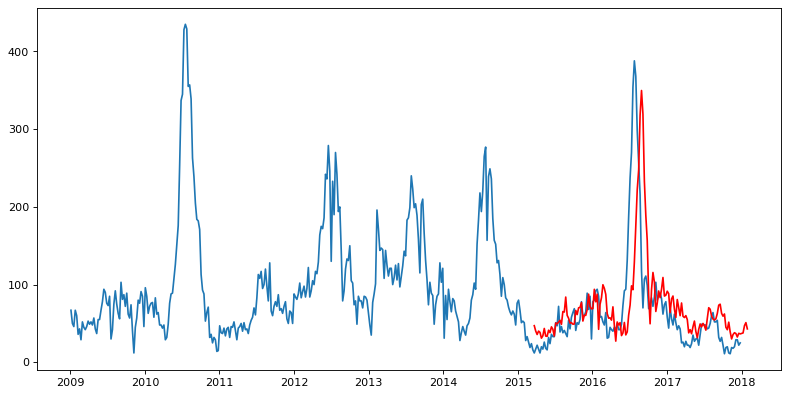

In [23]:
# best model for arima 1 week
cfg = [(1, 0, 3)]
# TMIN	TMEAN	RH mean	WINDSPEED mean
exog_list = create_exog_dict('RH mean', 12)

# 1 week forecast
n_step = 4
# grid search
scores = grid_search(cfg, exog_list, n_step)
print('done')
# list top 3 configs
for lag, error, p in scores[:3]:
    print(lag, error)
plot_modelz(scores[0][2])

0it [00:00, ?it/s]

starting grid search


13it [04:58, 22.95s/it]

done
{'WINDSPEED mean': 9} 57.438265048393234
{'WINDSPEED mean': 8} 57.62601386237651
{'WINDSPEED mean': 10} 57.88803250062111


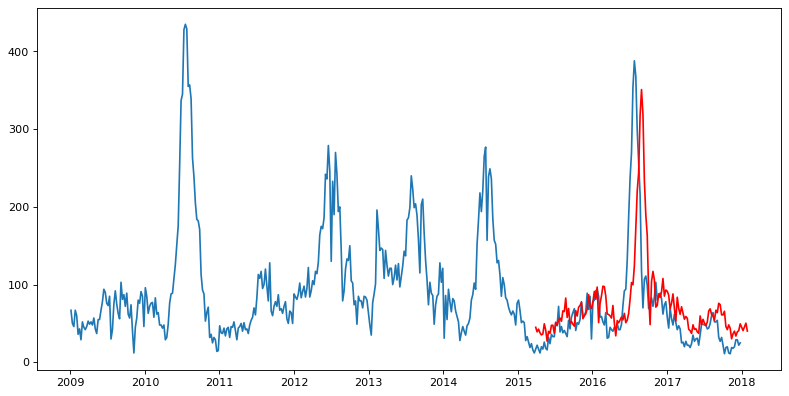

In [24]:
# best model for arima 1 week
cfg = [(1, 0, 3)]
# TMIN	TMEAN	RH mean	WINDSPEED mean
exog_list = create_exog_dict('WINDSPEED mean', 12)

# 1 week forecast
n_step = 4
# grid search
scores = grid_search(cfg, exog_list, n_step)
print('done')
# list top 3 configs
for lag, error, p in scores[:3]:
    print(lag, error)
plot_modelz(scores[0][2])

# 12 week forecasting

0it [00:00, ?it/s]

starting grid search


13it [02:36, 12.04s/it]


done
{'RAINFALL mean': 4} 73.69813145527296
{'RAINFALL mean': 6} 73.74501771993714
{'RAINFALL mean': 3} 73.75474658307769


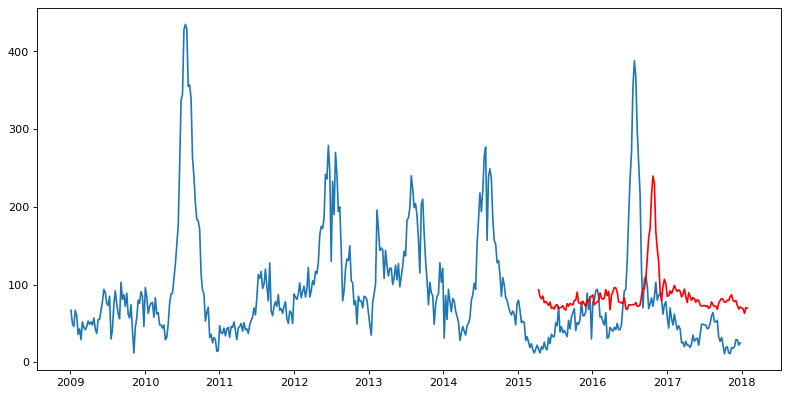

In [25]:
# best model for arima 12 week
cfg = [(1, 0, 3)]
# TMIN	TMEAN	RH mean	WINDSPEED mean
exog_list = create_exog_dict('RAINFALL mean', 12)

# 1 week forecast
n_step = 12
# grid search
scores = grid_search(cfg, exog_list, n_step)
print('done')
# list top 3 configs
for lag, error, p in scores[:3]:
    print(lag, error)
plot_modelz(scores[0][2])

0it [00:00, ?it/s]

starting grid search


13it [03:54, 18.01s/it]

done
{'TMIN': 1} 72.03414533639341
{'TMIN': 0} 74.09259573504875
{'TMIN': 3} 87.9435600027328


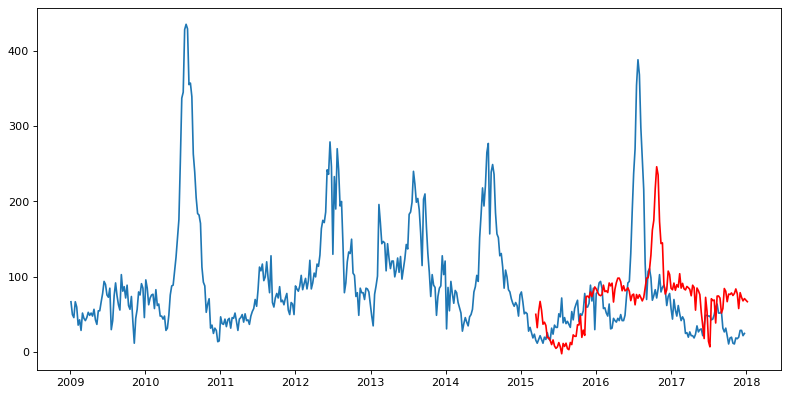

In [26]:
# best model for arima 1 week
cfg = [(1, 0, 3)]
# TMIN	TMEAN	RH mean	WINDSPEED mean
exog_list = create_exog_dict('TMIN', 12)

# 1 week forecast
n_step = 12
# grid search
scores = grid_search(cfg, exog_list, n_step)
print('done')
# list top 3 configs
for lag, error, p in scores[:3]:
    print(lag, error)
plot_modelz(scores[0][2])

0it [00:00, ?it/s]

starting grid search


13it [04:19, 19.93s/it]


done
{'TMEAN': 0} 70.9645523216565
{'TMEAN': 1} 71.81205130585238
{'TMEAN': 2} 71.88097643121864


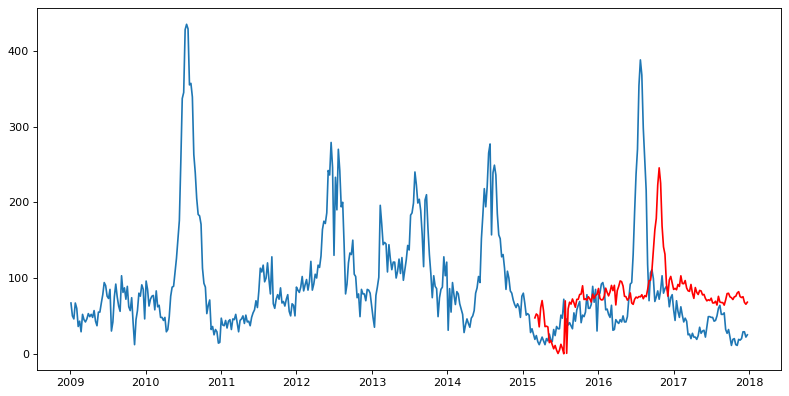

In [27]:
# best model for arima 1 week
cfg = [(1, 0, 3)]
# TMIN	TMEAN	RH mean	WINDSPEED mean
exog_list = create_exog_dict('TMEAN', 12)

# 1 week forecast
n_step = 12
# grid search
scores = grid_search(cfg, exog_list, n_step)
print('done')
# list top 3 configs
for lag, error, p in scores[:3]:
    print(lag, error)
plot_modelz(scores[0][2])

0it [00:00, ?it/s]

starting grid search


13it [03:44, 17.27s/it]

done
{'RH mean': 12} 73.41967556623862
{'RH mean': 11} 74.81696471428414
{'RH mean': 10} 76.9478570449926


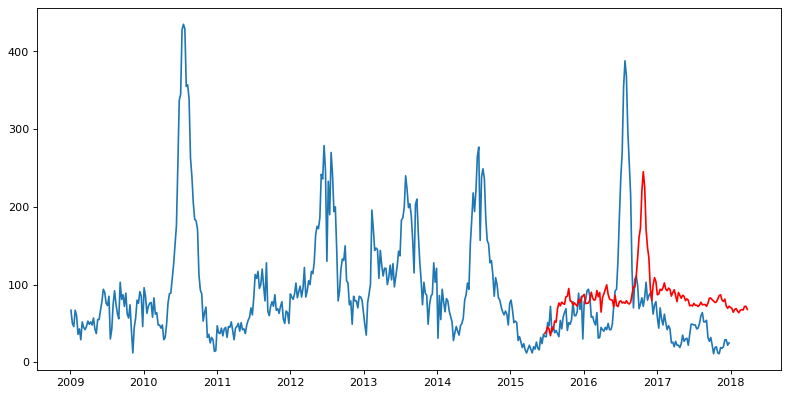

In [28]:
# best model for arima 1 week
cfg = [(1, 0, 3)]
# TMIN	TMEAN	RH mean	WINDSPEED mean
exog_list = create_exog_dict('RH mean', 12)

# 1 week forecast
n_step = 12
# grid search
scores = grid_search(cfg, exog_list, n_step)
print('done')
# list top 3 configs
for lag, error, p in scores[:3]:
    print(lag, error)
plot_modelz(scores[0][2])

0it [00:00, ?it/s]

starting grid search


13it [04:42, 21.76s/it]

done
{'WINDSPEED mean': 10} 74.59505787408779
{'WINDSPEED mean': 9} 74.72720055251588
{'WINDSPEED mean': 12} 74.84147460311682


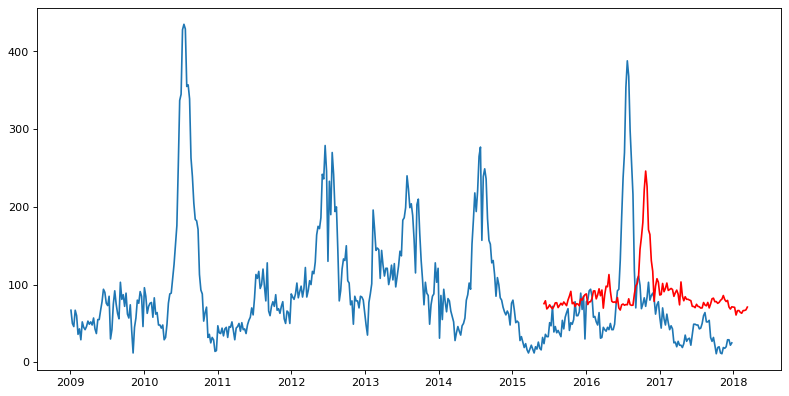

In [29]:
# best model for arima 1 week
cfg = [(1, 0, 3)]
# TMIN	TMEAN	RH mean	WINDSPEED mean
exog_list = create_exog_dict('WINDSPEED mean', 12)

# 1 week forecast
n_step = 12
# grid search
scores = grid_search(cfg, exog_list, n_step)
print('done')
# list top 3 configs
for lag, error, p in scores[:3]:
    print(lag, error)
plot_modelz(scores[0][2])